# KMeans for Image Compression

This notebook demonstrates how to fit a KMeans model on an image data essentially for image compression and clustering. It also takes into account how to convert an image data to a pandas dataframe. It also takes into account, the use of inertia and silhouette in assessing the performance of the model.

### Initialization and Setup
Initial setup and importation of libraries.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the image data
img = plt.imread("C:/Users/Uthman AbdulRahman/Documents/AI Blog Posts/kmeans/adire.jpg")


(1280, 869, 3)


(-0.5, 868.5, 1279.5, -0.5)

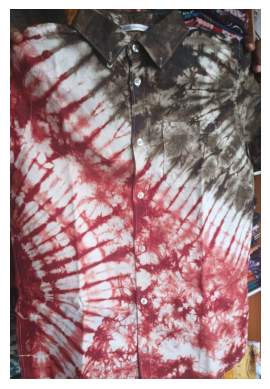

In [4]:
print(img.shape)
plt.imshow(img)
plt.axis('off')

In [5]:
# reshaping the data for modelling, we reshape it where each row represents a single pixel
# defined by three values: R, G, B
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[44, 40, 37],
       [43, 39, 36],
       [43, 39, 36],
       [42, 38, 35],
       [41, 37, 34]], dtype=uint8)

In [6]:
img_flat.shape

(1112320, 3)

In [7]:
# creating a pandas dataframe to help understand and visualize the data set
img_flat_df = pd.DataFrame(img_flat, columns =['r','g','b'])
img_flat_df.head()

,r,g,b
0,44,40,37
1,43,39,36
2,43,39,36
3,42,38,35
4,41,37,34


In [8]:
print(img_flat_df.head())   # View the first few rows
print(img_flat_df.dtypes)   # Check data types
print(img_flat_df.isnull().sum())  # Ensure no missing values

    r   g   b
0  44  40  37
1  43  39  36
2  43  39  36
3  42  38  35
4  41  37  34
r    uint8
g    uint8
b    uint8
dtype: object
r    0
g    0
b    0
dtype: int64


In [18]:
# Taking a sample out of the dataframe
sample_df = img_flat_df.sample(700000, random_state=42)  # Sample 700000 pixels

In [ ]:
import plotly.graph_objects as go



# Ensure color format is correct
color = ['rgba({},{},{},0.5)'.format(int(r), int(g), int(b)) for r, g, b in
         zip(sample_df['r'], sample_df['g'], sample_df['b'])]

# Create 3D scatter plot
trace = go.Scatter3d(
    x=sample_df['r'],
    y=sample_df['g'],
    z=sample_df['b'],
    mode='markers',
    marker=dict(
        size=2,
        color=color,
        opacity=0.5
    )
)

# Define layout
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='R',
        yaxis_title='G',
        zaxis_title='B'
    )
)

# Create figure and display
fig = go.Figure(data=[trace], layout=layout)
fig.show()

### Instatiating the Model

In [9]:
# instantiate the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42).fit(img_flat)


C:\Users\Uthman AbdulRahman\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-0.5, 868.5, 1279.5, -0.5)

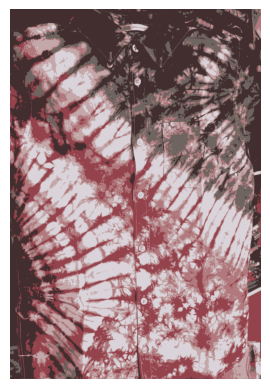

In [10]:
import numpy as np
# copy the original image 'img_flat' so we can modify it
img_flat1 = img_flat.copy()

# Replace each row in the original image with its closest cluster center
for i in np.unique(kmeans.labels_):
  img_flat1[kmeans.labels_ == i,:] = kmeans.cluster_centers_[i]
# Reshape the data back
img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off')

In [ ]:
# calculating the mean of each column in the flattened array i.e the RGB values
column_means = img_flat.mean(axis=0)
print('column means: ', column_means)

column means:  [150.13350654 116.94050093 120.3250036 ]


In [ ]:
print('cluster centers: ', kmeans.cluster_centers_)

cluster centers:  [[219.30752771 212.53983289 218.71757294]
 [145.20870825  82.29817661  88.22211089]
 [ 52.82051945  42.85802365  43.19472021]
 [197.59424637 167.61538639 170.1322345 ]
 [171.97149526 124.23805182 126.89881365]
 [ 98.32808648  59.69099967  61.5082511 ]]


### Display of colour swatches in the shirt image

In [11]:
# helper function that creates colour swatches
def show_swatch(RGB_value):
  ### Takes in the RGB value and outputs a colour swatch
  R, G, B = RGB_value
  rgb = [[np.array([R,G,B]).astype('uint8')]]
  plt.figure()
  plt.imshow(rgb)
  plt.axis('off')

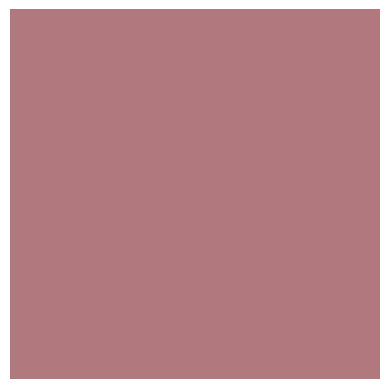

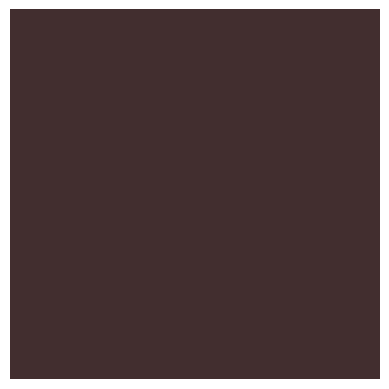

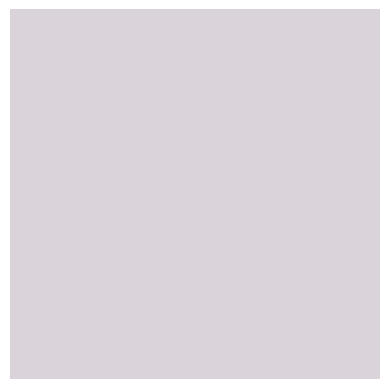

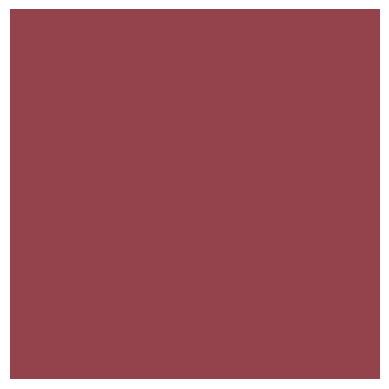

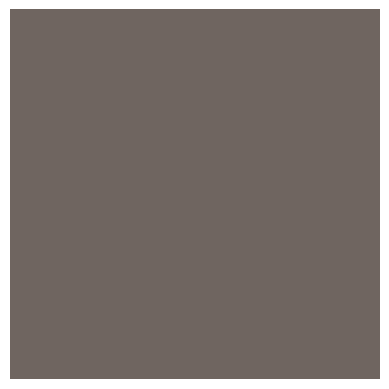

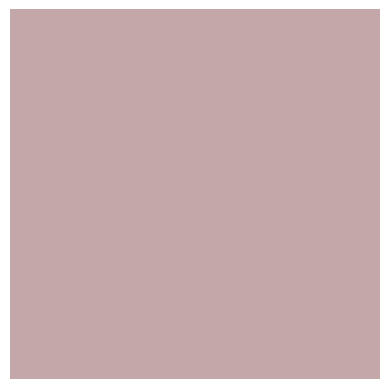

In [12]:
centers = kmeans.cluster_centers_
# display the colour swatches
for pixel in centers:
  show_swatch(pixel)

In [ ]:
def cluster_image(k, img=img):
  img_flat = img.reshape(img.shape[0]*img.shape[1],3)
  kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)
  new_img = img_flat.copy()
  for i in np.unique(kmeans.labels_):
    new_img[kmeans.labels_ == i,:] = kmeans.cluster_centers_[i]
  new_img = new_img.reshape(img.shape)
  return plt.imshow(new_img), plt.axis('off');

(<matplotlib.image.AxesImage at 0x7c9dd070d2d0>, (-0.5, 868.5, 1279.5, -0.5))

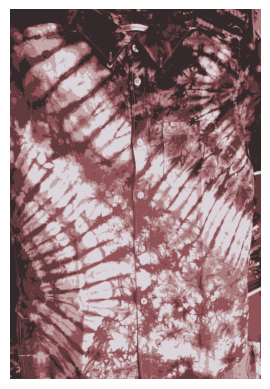

In [ ]:
cluster_image(6)

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib

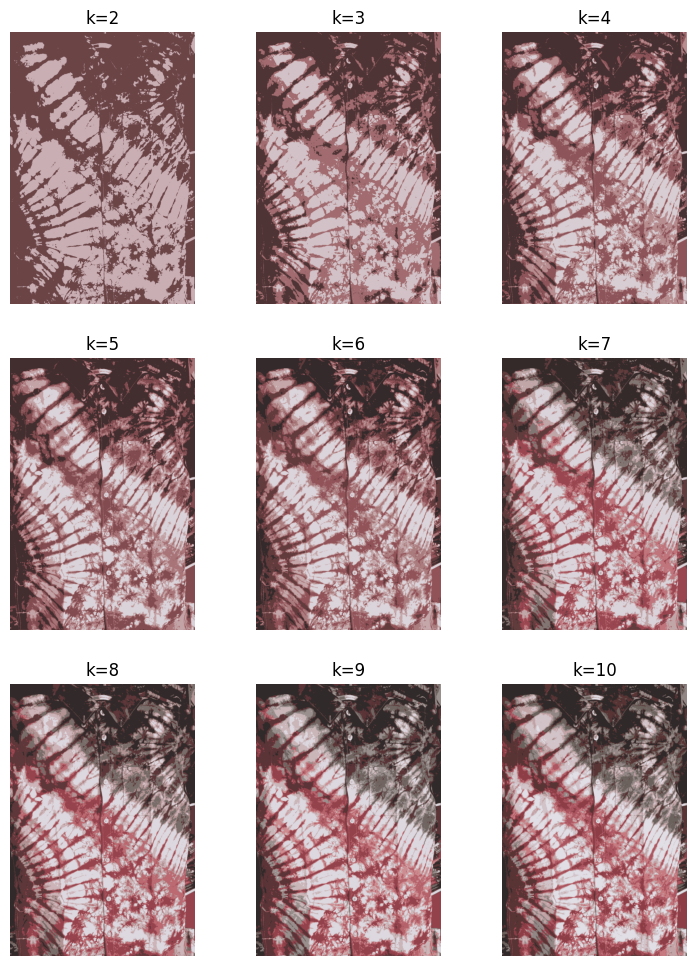

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib

def cluster_image_grid(k, ax, img=img):
    img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(img_flat)

    new_img = img_flat.copy()

    for i in np.unique(kmeans.labels_):
        new_img[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

    new_img = new_img.reshape(img.shape)
    ax.imshow(new_img)

    ax.axis('off')

fig, axs = plt.subplots(3, 3)
fig = plt.gcf()  # Use plt.gcf()
fig.set_size_inches(9, 12)

axs = axs.flatten()
k_values = np.arange(2, 11)

for i, k in enumerate(k_values):
    cluster_image_grid(k, axs[i], img=img)
    axs[i].title.set_text('k=' + str(k))

plt.show() # Add this to display the plot

## Evaluation of the Model and Selecting the Optimal KMean values

In [13]:
## Important imports for evaluation
from sklearn.metrics import silhouette_score

# visualization package import
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
print('clusters: ',kmeans.labels_)
print('Inertia: ',kmeans.inertia_)

clusters:  [1 1 1 ... 4 4 4]
Inertia:  925641560.8886801


In [15]:
# create a list from 2:10.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)  # Note: It should be kms.inertia_ not kms.inertia

    return inertia

C:\Users\Uthman AbdulRahman\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Uthman AbdulRahman\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Uthman AbdulRahman\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Uthman AbdulRahman\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

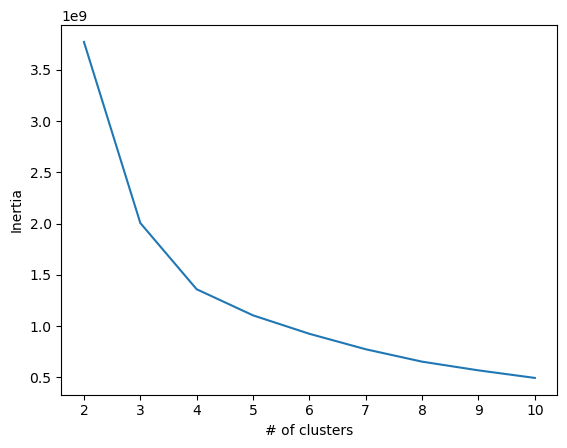

In [16]:
inertia = kmeans_inertia(num_clusters, img_flat)
plot  = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Inertia");

In [ ]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
img_scaled = StandardScaler().fit_transform(img_flat)

In [ ]:
kmeans_sil_score = silhouette_score(img_scaled, kmeans.labels_)
kmeans_sil_score

In [ ]:
# plot the silhouette scores
def kmeans_sil_score(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's silhouette score
    """
    sil_scores = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_scores.append(silhouette_score(x_vals, kms.labels_))

    return sil_scores

In [ ]:
plot = sns.lineplot(x=num_clusters, y=kmeans_sil_score(num_clusters, X_scaled))
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

In [ ]:
kmeans_sil_score = silhouette_score(X_scaled, kmeans.labels_)
kmeans_sil_score

In [ ]:
# plot the silhouette scores
def kmeans_sil_score(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's silhouette score
    """
    sil_scores = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_scores.append(silhouette_score(x_vals, kms.labels_))

    return sil_scores